CSC 369 2.0 Machine Learning I
Assignment - 2018
Index Number : AS2015307

In [455]:
#
import tensorflow
import keras

import numpy as np
import pandas as pd
import scipy



import pylab 
#from pylab import reParams
import itertools
import urllib
from random import randint
import sklearn
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
  
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix  

from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import matplotlib.pyplot as plt

### Importing data file

In [456]:
adult_income=pd.read_csv("Adult_Census_Income_Binary_Classification_dataset.csv")
adult_income.columns = [ 'age','workclass','education','education-num',' marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
categorical_columns = []
for i in [1,2,4,5,6,7,8,12,13]:
    categorical_columns.append(df.columns[i])

In [458]:
adult_income= adult_income.replace('[?]', np.nan, regex=True)
adult_income.isnull().head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [459]:
#DROP NAN VALUES
df=adult_income.dropna(how='any')
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


##### LABEL ENCODING

In [460]:
for i in categorical_columns:
    df[i] = df[i].astype('category')


C:\Users\Samali\Anaconda3\envs\assignment\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [461]:
for i in categorical_columns:
    df[i] = pd.Categorical(df[i]).codes

C:\Users\Samali\Anaconda3\envs\assignment\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [462]:
#Only categorical data columns had labled
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,5,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [463]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

#### normalizing 

In [473]:
#X = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
df = pd.DataFrame(x_scaled)
df.head()

C:\Users\Samali\Anaconda3\envs\assignment\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.95
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.95
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.95
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.95
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.10


Divide dataset as train and test

In [474]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

## Bulding algorithms

### KNN algorithm

In [475]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=1)#parameters asssigns to its default
classifier.fit(X_train, y_train)#model learns the relation between x and y
print(classifier)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [476]:

y_pred = classifier.predict(X_test)#passing x test data set 

print(classification_report(y_test, y_pred))  

             precision    recall  f1-score   support

          0       0.87      0.87      0.87      6842
          1       0.59      0.59      0.59      2207

avg / total       0.80      0.80      0.80      9049



In [477]:
classifier.score(X_test, y_test)

0.7995358603160571

when K=1 accuracy of model is 79%

In [480]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    #optimal_k = neighbors[error.index(min(error))]

Text(0,0.5,'Mean Error')

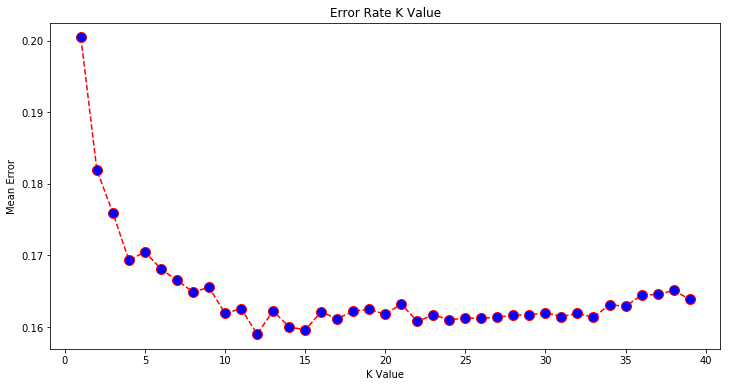

In [481]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

### we need to find optimal k value
##### let's take K value which minimum error occurs as  K=16 as shown in graph

In [482]:
classifier = KNeighborsClassifier(n_neighbors=16)
classifier.fit(X_train, y_train)#model learns the relation between x and y
print(classifier)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=16, p=2,
           weights='uniform')


In [483]:
y_pred = classifier.predict(X_test)#passing x test data set 

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      0.93      0.90      6842
          1       0.72      0.55      0.63      2207

avg / total       0.83      0.84      0.83      9049



In [484]:
classifier.score(X_test, y_test)

0.8378826389656315

##### when K=16 model performe more accurately than K=1
Model has 83% accuracy







#     

### Logistic Regression algorithm 

In [485]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation

In [486]:
from keras.utils import np_utils 
Y_train = np_utils.to_categorical(y_train, 2) 
Y_test = np_utils.to_categorical(y_test, 2)

In [487]:
model = Sequential()
model.add(Dense(2, input_shape=(13,)))
model.add(Activation('softmax'))

In [488]:
from keras import optimizers

model.compile(optimizer=optimizers.SGD(lr=0.05), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 2)                 28        
_________________________________________________________________
activation_7 (Activation)    (None, 2)                 0         
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [489]:
history = model.fit(X_train, Y_train, batch_size=128, nb_epoch=20,verbose=0, validation_data=(X_test, Y_test))

C:\Users\Samali\Anaconda3\envs\assignment\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Text(0.5,0,'epoch')

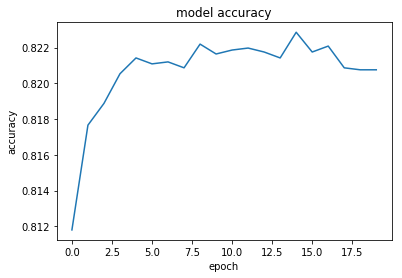

In [490]:
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [491]:
score = model.evaluate(X_test, Y_test) 
print('Test accuracy:', score[1])

9049/9049 [==============================] - 0s 20us/step
Test accuracy: 0.8207536743667089


Model has 82% accuracy. but model has overfitted here. Because model increses accuracy and again decrese accuracy when the 

# Neural network

In [492]:
model = Sequential([
    Dense(20,input_shape =(13,), activation ="relu"),
    Dense(20, activation ="relu"),
    Dense(2, activation ="softmax")
])

In [493]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_18 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 42        
Total params: 742
Trainable params: 742
Non-trainable params: 0
_________________________________________________________________


train the model

In [494]:
model.compile(Adam(lr=0.001), loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

In [495]:
history = model.fit(X_train, y_train, validation_split=0.1, batch_size=100, epochs=10, shuffle=True, verbose=2)
#10% data set as validation data

Train on 19001 samples, validate on 2112 samples
Epoch 1/10
 - 1s - loss: 0.4526 - acc: 0.7856 - val_loss: 0.3937 - val_acc: 0.8196
Epoch 2/10
 - 0s - loss: 0.3713 - acc: 0.8283 - val_loss: 0.3657 - val_acc: 0.8295
Epoch 3/10
 - 0s - loss: 0.3527 - acc: 0.8349 - val_loss: 0.3526 - val_acc: 0.8333
Epoch 4/10
 - 0s - loss: 0.3429 - acc: 0.8400 - val_loss: 0.3469 - val_acc: 0.8376
Epoch 5/10
 - 0s - loss: 0.3385 - acc: 0.8425 - val_loss: 0.3432 - val_acc: 0.8385
Epoch 6/10
 - 0s - loss: 0.3358 - acc: 0.8439 - val_loss: 0.3425 - val_acc: 0.8390
Epoch 7/10
 - 0s - loss: 0.3340 - acc: 0.8436 - val_loss: 0.3392 - val_acc: 0.8400
Epoch 8/10
 - 0s - loss: 0.3322 - acc: 0.8449 - val_loss: 0.3395 - val_acc: 0.8419
Epoch 9/10
 - 0s - loss: 0.3303 - acc: 0.8446 - val_loss: 0.3367 - val_acc: 0.8366
Epoch 10/10
 - 0s - loss: 0.3293 - acc: 0.8458 - val_loss: 0.3377 - val_acc: 0.8414


In [496]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Text(0.5,0,'epoch')

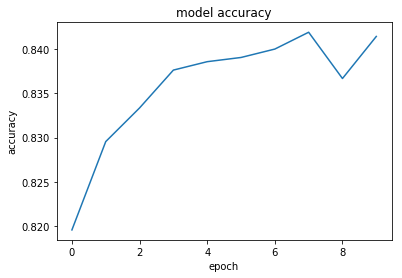

In [497]:
#plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [498]:
rounded_predictions= model.predict_classes(X_test, batch_size=200, verbose=0)

In [499]:
#for i in rounded_predictions:
    #print(i)

confusion matrics

In [500]:
cm = confusion_matrix(y_test, rounded_predictions)

In [503]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation =45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[6349  493]
 [ 914 1293]]


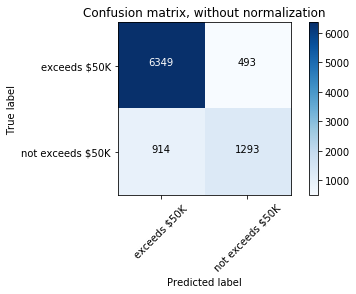

In [505]:
cm_plot_labels=['exceeds $50K','not exceeds $50K']
#plot_confusion_matrix[cm, cm_plot_labels]
plot_confusion_matrix(cm, cm_plot_labels,
                      title='Confusion matrix, without normalization')

In [509]:
accuracy = (6349+1293)/9049
accuracy

0.8445132058791026

Model has 84% accuracy.